In [5]:
from skimage import measure,morphology
from scipy.ndimage import label
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def KMeansOnImage(filename):
  image = cv2.imread(filename)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  pixels = image_rgb.reshape(-1, 3)
  kmeans = KMeans(n_clusters=10, random_state=0,n_init=10)
  kmeans.fit(pixels)


  labels = kmeans.labels_.reshape(image_rgb.shape[:2])
  cluster_centers = kmeans.cluster_centers_

  longest_length = 0
  road_cluster = -1


  for cluster_num in range(kmeans.n_clusters):
      cluster_mask = (labels == cluster_num).astype(int)
      labeled_array, num_features = label(cluster_mask)
      regions = measure.regionprops(labeled_array)
      for region in regions:
          if region.major_axis_length > longest_length:
              longest_length = region.major_axis_length
              road_cluster = cluster_num


  road_mask = (labels == road_cluster).astype(np.uint8)


  kernel = np.ones((5, 5), np.uint8)
  dilated_road = cv2.dilate(road_mask, kernel, iterations=2)

  labeled_array, num_features = label(dilated_road)
  regions = measure.regionprops(labeled_array)


  final_output_mask = np.zeros_like(dilated_road)

  longest_region = max(regions, key=lambda x: x.area)
  for coord in longest_region.coords:
      final_output_mask[coord[0], coord[1]] = 1

  final_output_image = (final_output_mask * 255).astype(np.uint8)

  # plt.figure(figsize=(8, 6))
  # plt.imshow(final_output_image, cmap='gray')
  # plt.title("Longest Connected Component Highlighted")
  # plt.axis('off')
  # plt.show()

  kernel = np.ones((5, 5), np.uint8)
  opening = cv2.morphologyEx(final_output_image, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

  plt.figure(figsize=(12, 6))

  # Show input image
  plt.subplot(1, 2, 1)
  plt.imshow(image_rgb)
  plt.title("Satellite Image")
  plt.axis('off')
  # Show closing image
  plt.subplot(1, 2, 2)
  plt.imshow(closing, cmap='gray')
  plt.title("Masked Image")
  plt.axis('off')

  plt.show()

  return closing

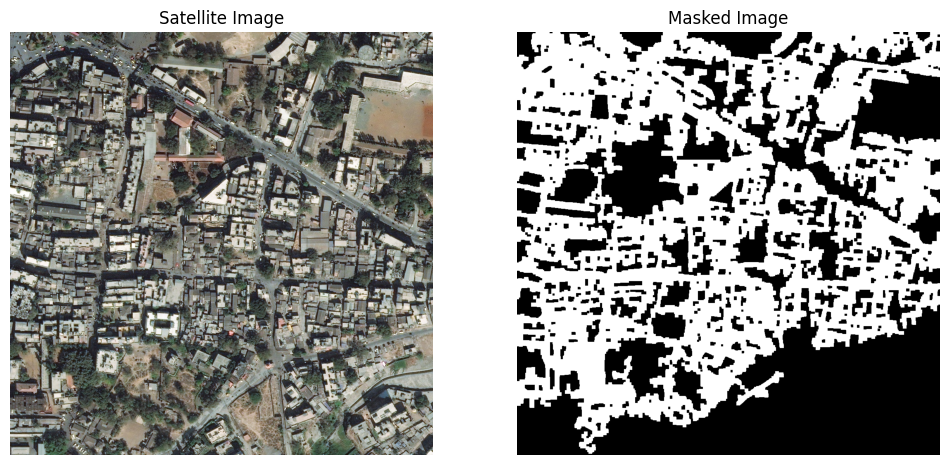

Saved Image: KMeans_ImageDump/1945_sat.jpg


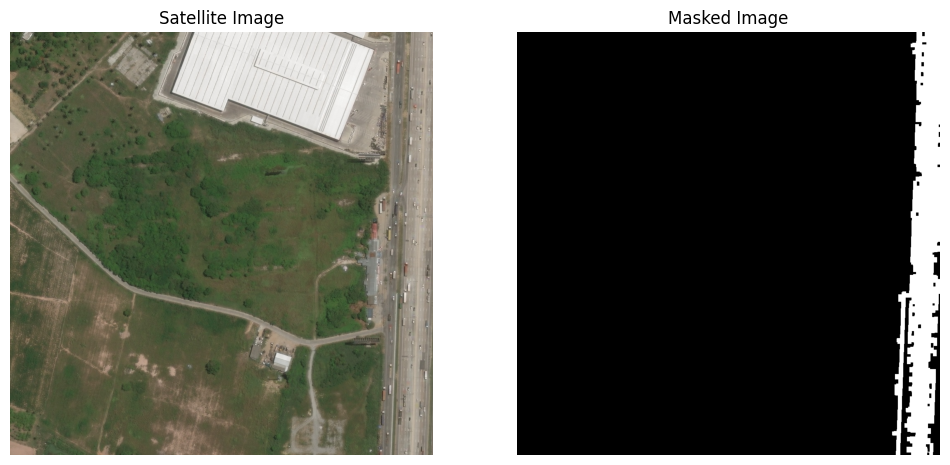

Saved Image: KMeans_ImageDump/26895_sat.jpg


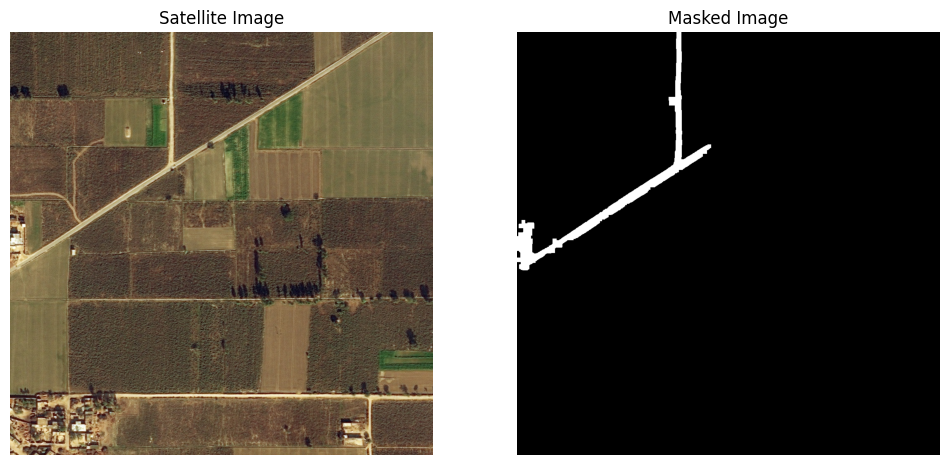

Saved Image: KMeans_ImageDump/12023_sat.jpg


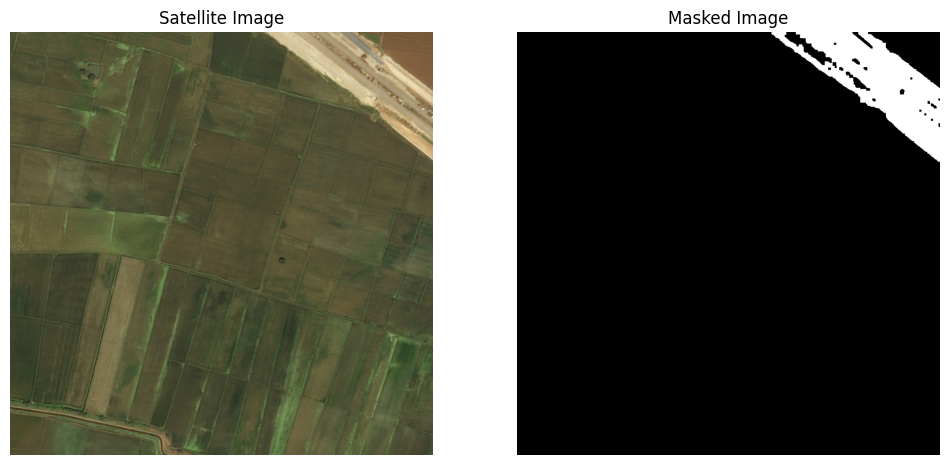

Saved Image: KMeans_ImageDump/9937_sat.jpg


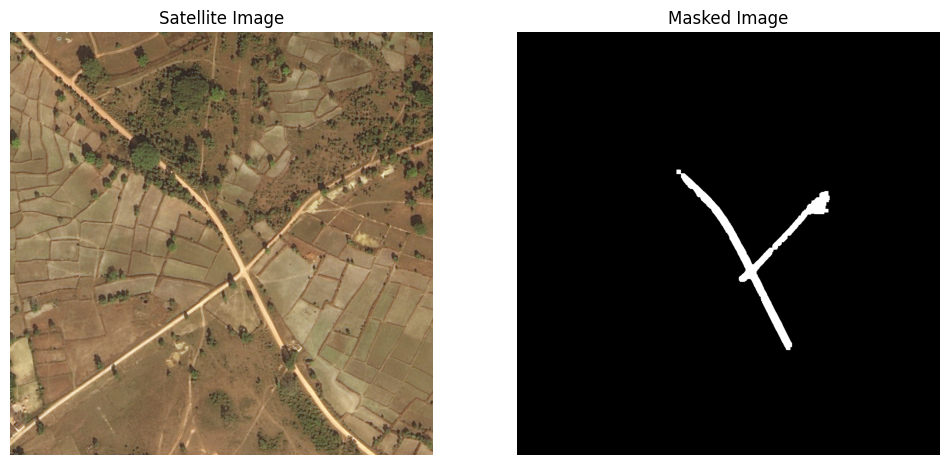

Saved Image: KMeans_ImageDump/11545_sat.jpg


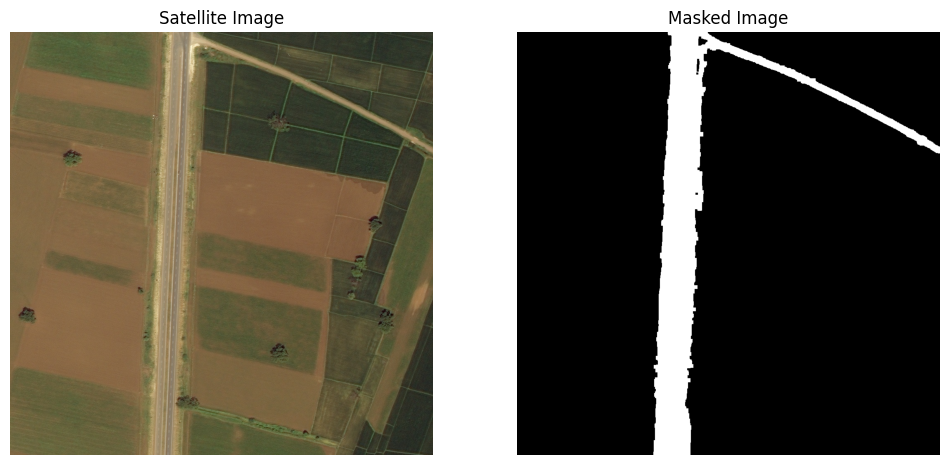

Saved Image: KMeans_ImageDump/2129_sat.jpg


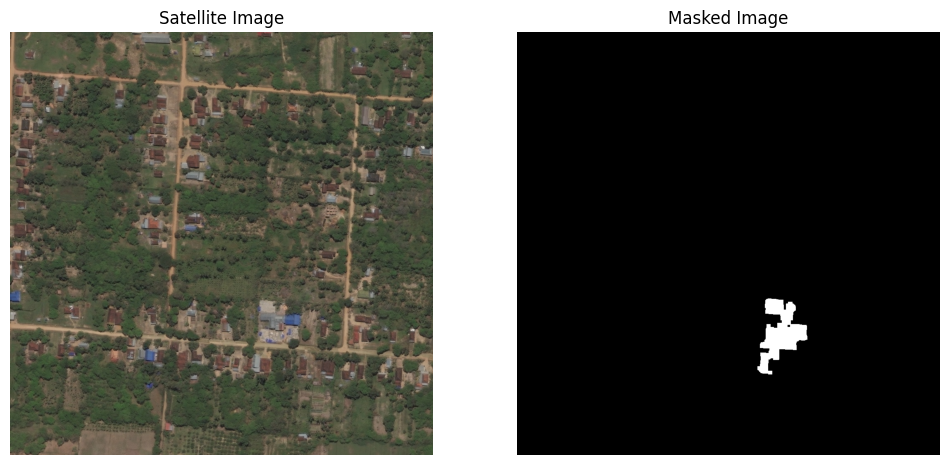

Saved Image: KMeans_ImageDump/3280_sat.jpg


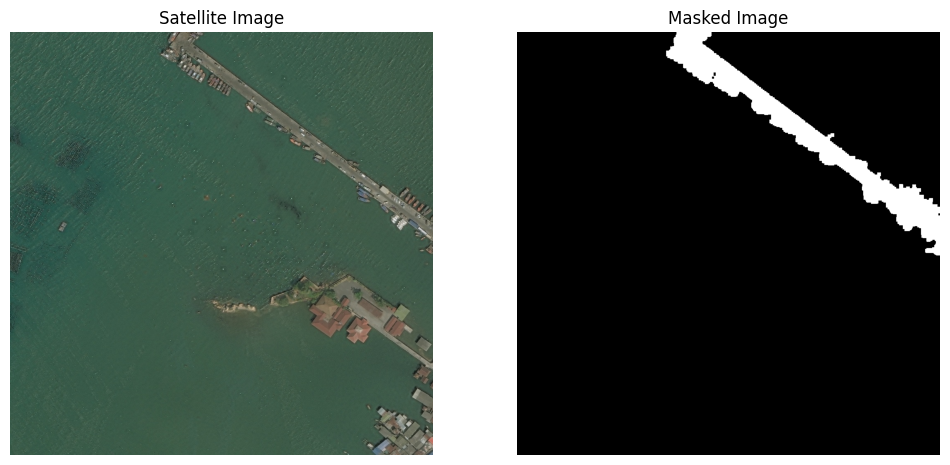

Saved Image: KMeans_ImageDump/4301_sat.jpg


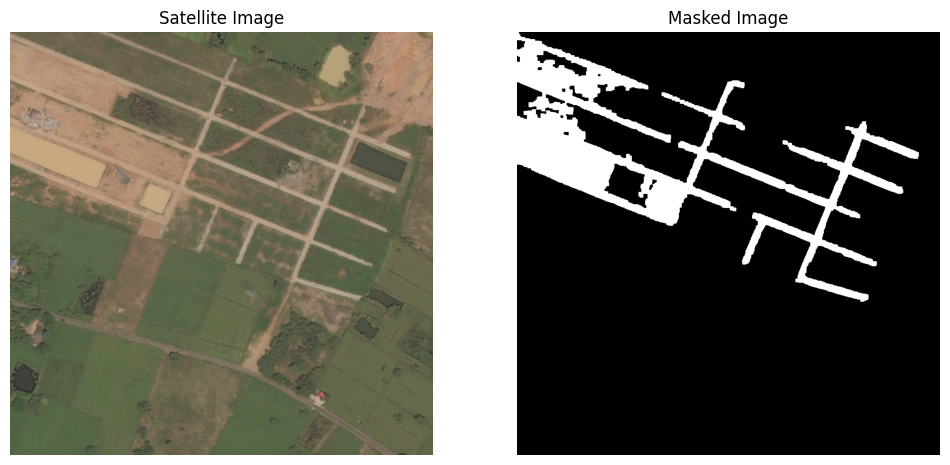

Saved Image: KMeans_ImageDump/15347_sat.jpg


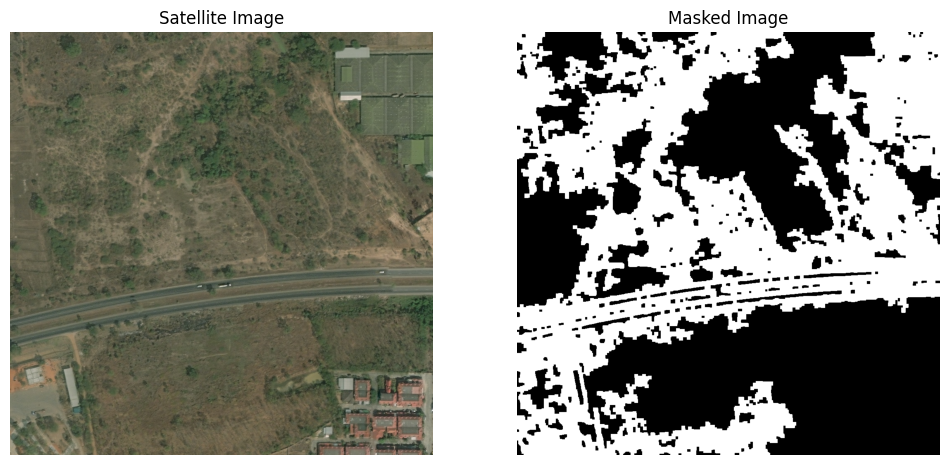

Saved Image: KMeans_ImageDump/6281_sat.jpg


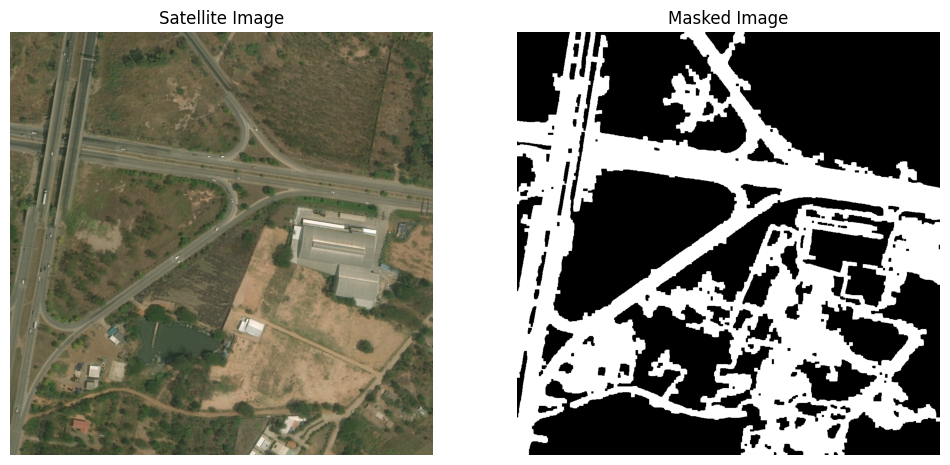

Saved Image: KMeans_ImageDump/17193_sat.jpg


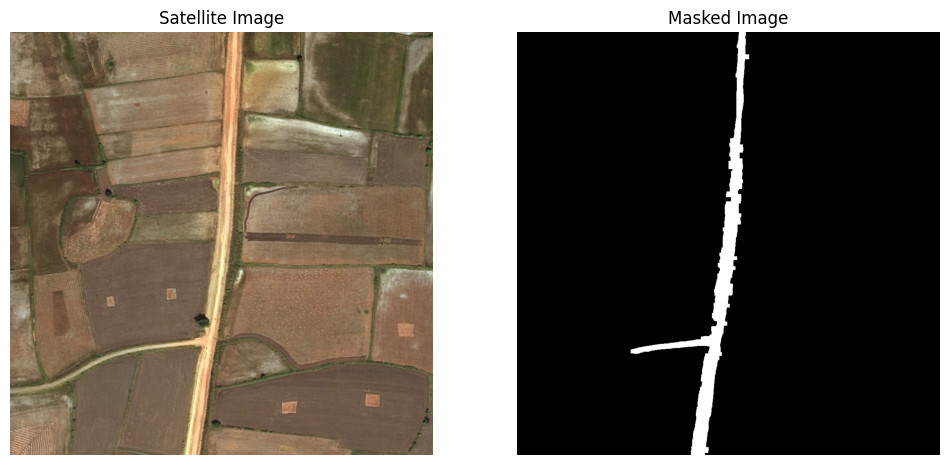

Saved Image: KMeans_ImageDump/18309_sat.jpg


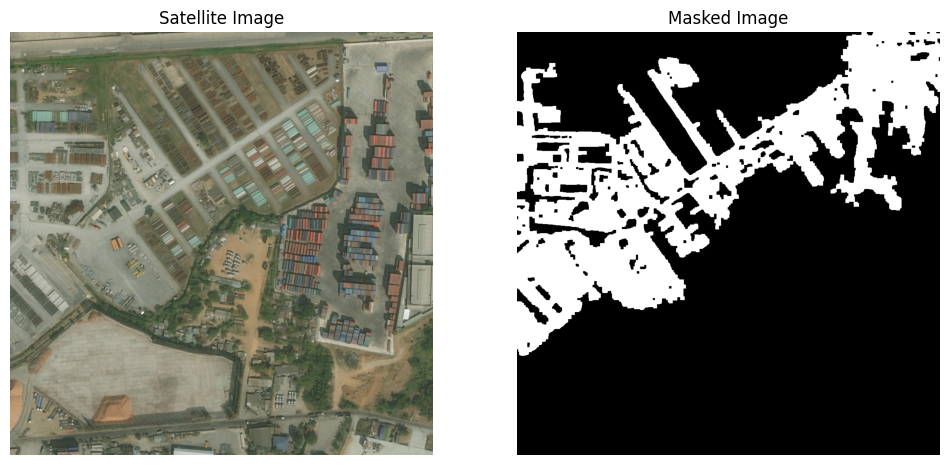

Saved Image: KMeans_ImageDump/8646_sat.jpg


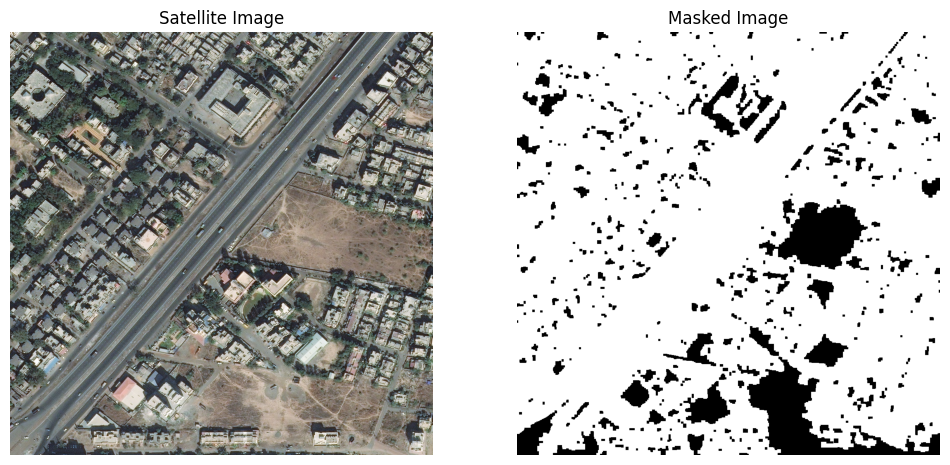

Saved Image: KMeans_ImageDump/23824_sat.jpg


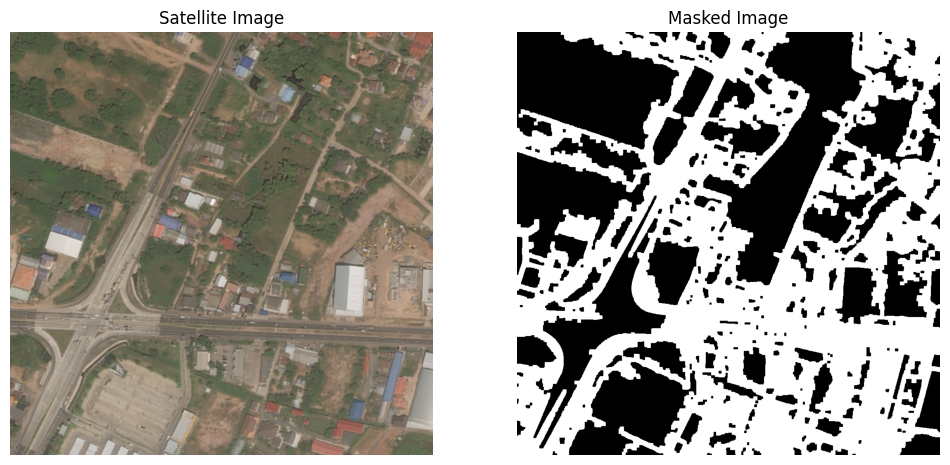

Saved Image: KMeans_ImageDump/25459_sat.jpg


In [6]:

l = [
    "Data/1945_sat.jpg", "Data/26895_sat.jpg", "Data/12023_sat.jpg", "Data/9937_sat.jpg",
    "Data/11545_sat.jpg", "Data/2129_sat.jpg", "Data/3280_sat.jpg", "Data/4301_sat.jpg",
    "Data/15347_sat.jpg", "Data/6281_sat.jpg", "Data/17193_sat.jpg", "Data/18309_sat.jpg",
    "Data/8646_sat.jpg", "Data/23824_sat.jpg", "Data/25459_sat.jpg"
]


for i in range(len(l)):
    final = KMeansOnImage(l[i])
    KMeans_ImageDump = f"{'KMeans_ImageDump/'}{l[i].lstrip('Data/')}"
    print("Saved Image:", KMeans_ImageDump)
    plt.imsave(KMeans_ImageDump, final, cmap='gray')